### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/2022-ipl-auction-dataset/ipl_2022_dataset.csv


### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/2022-ipl-auction-dataset/ipl_2022_dataset.csv', index_col='Unnamed: 0')

In [3]:
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [4]:
df.shape

(633, 7)

In [5]:
df.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [6]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [7]:
df.tail()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [8]:
df.sample(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
189,Luvnith Sisodia,20 Lakh,WICKETKEEPER,0.2,26.0,NaN,Royal Challengers Bangalore
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
516,Mayank Dagar,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold
550,Johannes Smit,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold
615,Mark Deyal,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


In [10]:
df.describe()

,COST IN ₹ (CR.),Cost IN $ (000)
count,237.000000,237.000000
mean,3.695781,480.451477
std,4.238092,550.951945
min,0.200000,26.000000
25%,0.400000,52.000000
50%,1.900000,247.000000
75%,6.500000,845.000000
max,17.000000,2210.000000


### Data Cleaning

In [11]:
df.isna().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [12]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)

Players which went Unsold in 2022 Auctions so their Cost we can replace with 0

In [13]:
df['2021 Squad'] = df['2021 Squad'].fillna('Not Played in  IPL 2021')

In [14]:
df.isna().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

##### All null values are treated

In [15]:
df[df.duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.0,0.0,Not Played in IPL 2021,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.0,0.0,Not Played in IPL 2021,Unsold


It may possible that two players have same name, price and category but as this player had gone unsold so let's just ignore this for now

In [16]:
teams = df[df['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
df['status'] = df['Team'].replace(teams,'sold')

In [18]:
df['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [19]:
df['retention'] = df['Base Price']

In [20]:
df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)

In [21]:
df['Base Price'].replace('Draft Pick',0, inplace = True)

In [22]:
df['base_price_unit'] = df['Base Price'].apply(lambda x: str(x).split(' ')[-1])
df['base_price'] = df['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [23]:
df['base_price'].replace('Retained',0,inplace=True)

In [24]:
df['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [25]:
df['base_price_unit'] = df['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})

In [26]:
df['base_price'] = df['base_price'].astype(float)
df['base_price_unit'] = df['base_price_unit'].astype(int)
df['base_price'] = df['base_price']*df['base_price_unit']

In [27]:
df.drop(['Base Price','base_price_unit'], axis =1, inplace = True)

In [28]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)']*100

In [29]:
df = df.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [30]:
df.columns

Index(['Player', 'Type', 'Sold_for_lakh', 'Cost_in_dollars', 'Prev_team',
       'Curr_team', 'status', 'retention', 'base_price'],
      dtype='object')

In [31]:
df.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


In [32]:
df.sample(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
273,Chris Lynn,BATTER,0.0,0.0,MI,Unsold,Unsold,In Auction,150.0
460,Swaraj Wabale,BOWLER,0.0,0.0,Not Played in IPL 2021,Unsold,Unsold,In Auction,20.0
60,Kamlesh Nagarkoti,ALL-ROUNDER,110.0,143.0,KKR,Delhi Capitals,sold,In Auction,40.0
337,Ben Cutting,ALL-ROUNDER,0.0,0.0,KKR,Unsold,Unsold,In Auction,75.0
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,CSK,Chennai Super Kings,sold,In Auction,100.0


##### Now data looks clean so let's start exploring fields and analysis😊

### Exploring Fields

In [33]:
df['Type'].value_counts()

ALL-ROUNDER     242
BOWLER          215
BATTER          112
WICKETKEEPER     64
Name: Type, dtype: int64

In [34]:
df['status'].value_counts()

Unsold    396
sold      237
Name: status, dtype: int64

In [35]:
df['retention'].value_counts()

In Auction    600
Retained       27
Draft Pick      6
Name: retention, dtype: int64

In [36]:
df['Prev_team'].value_counts()

Not Played in  IPL 2021    434
SRH                         26
MI                          26
KKR                         25
RR                          25
CSK                         25
DC                          25
PBKS                        24
RCB                         23
Name: Prev_team, dtype: int64

In [37]:
df['Curr_team'].value_counts()

Unsold                         396
Chennai Super Kings             25
Kolkata Knight Riders           25
Punjab Kings                    25
Mumbai Indians                  25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Lucknow Super Giants            22
Royal Challengers Bangalore     22
Name: Curr_team, dtype: int64

### Analysis

In [38]:
import random
colors=['#8B0000', '#006400', '#8B8B00', '#00008B', '#8B008B', '#32CD32', '#8B008B', '#FF8C00', 
        '#A9A9A9', '#008B8B', '#8B008B', '#8B4513', '#556B2F', '#008080']

random_colors = random.sample(colors, len(colors))

#### Total Players

In [39]:
df.index[-1]+1

633

Total 633 players were there in the TATA IPL 2022 Auction list

#### Types of players

In [40]:
types = df['Type'].value_counts()
types.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


(-1.0999938508480913,
 1.0999979929787553,
 -1.0999975809847236,
 1.099999350725298)

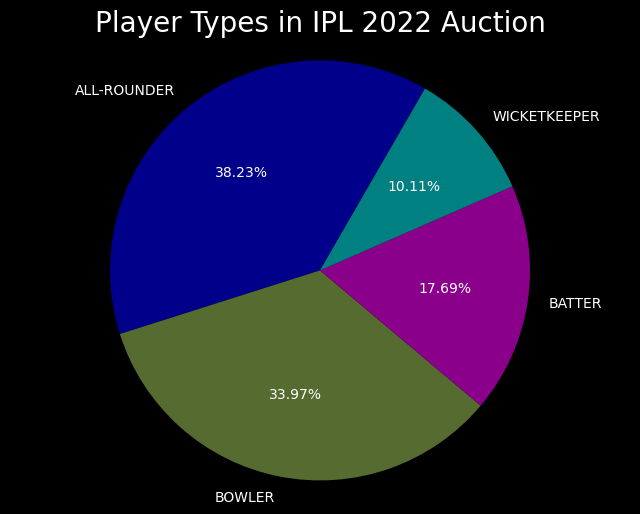

In [41]:
player_type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(types, labels=player_type_counts.index, autopct='%1.2f%%', startangle=60, colors=random_colors)
plt.title("Player Types in IPL 2022 Auction", fontsize=20)
plt.axis('equal')

Majority of players were either All-Rounders or Bowlers in Auction

#### Sold vs Unsold players

In [42]:
status_counts = df['status'].value_counts()
status_counts

Unsold    396
sold      237
Name: status, dtype: int64

(-1.0999999258708981,
 1.0999998739258328,
 -1.0999998578230827,
 1.0999989859394688)

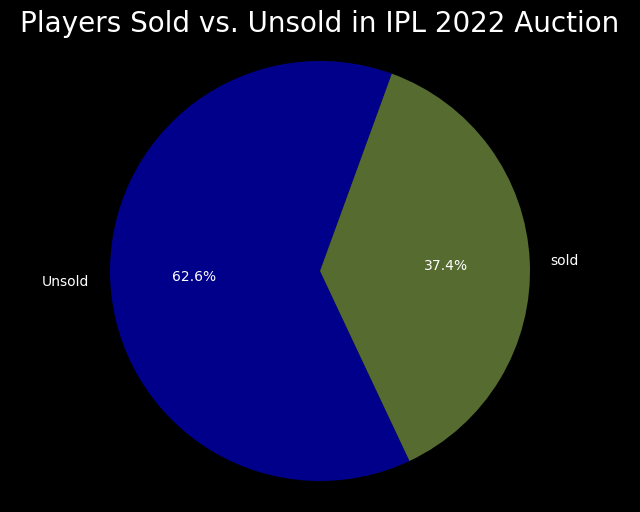

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=70, colors=random_colors)
plt.title("Players Sold vs. Unsold in IPL 2022 Auction", fontsize=20)
plt.axis('equal')

Majority of players were unsold in this Auction (Sold-> 396, Unsold-> 237)

#### Number of Players Bought by Each Team

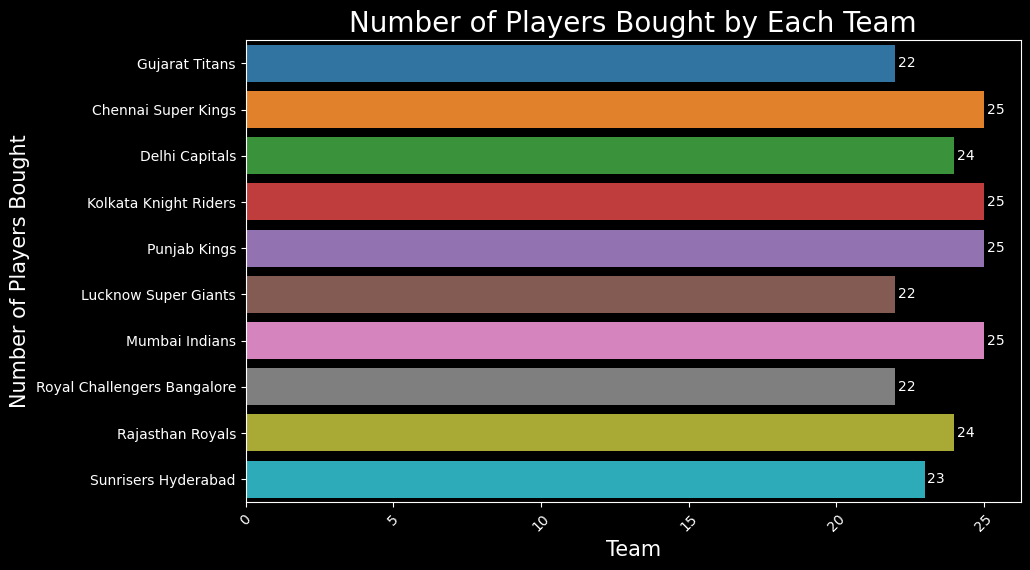

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df[df['Curr_team']!='Unsold'], y='Curr_team', palette='tab10')
plt.xticks(rotation=45)
plt.title("Number of Players Bought by Each Team", fontsize=20)
plt.xlabel("Team", fontsize=15)
plt.ylabel("Number of Players Bought", fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

Each team had bought at least 22 players in their squad

#### Number of Players In Auction and Retained for Each Team

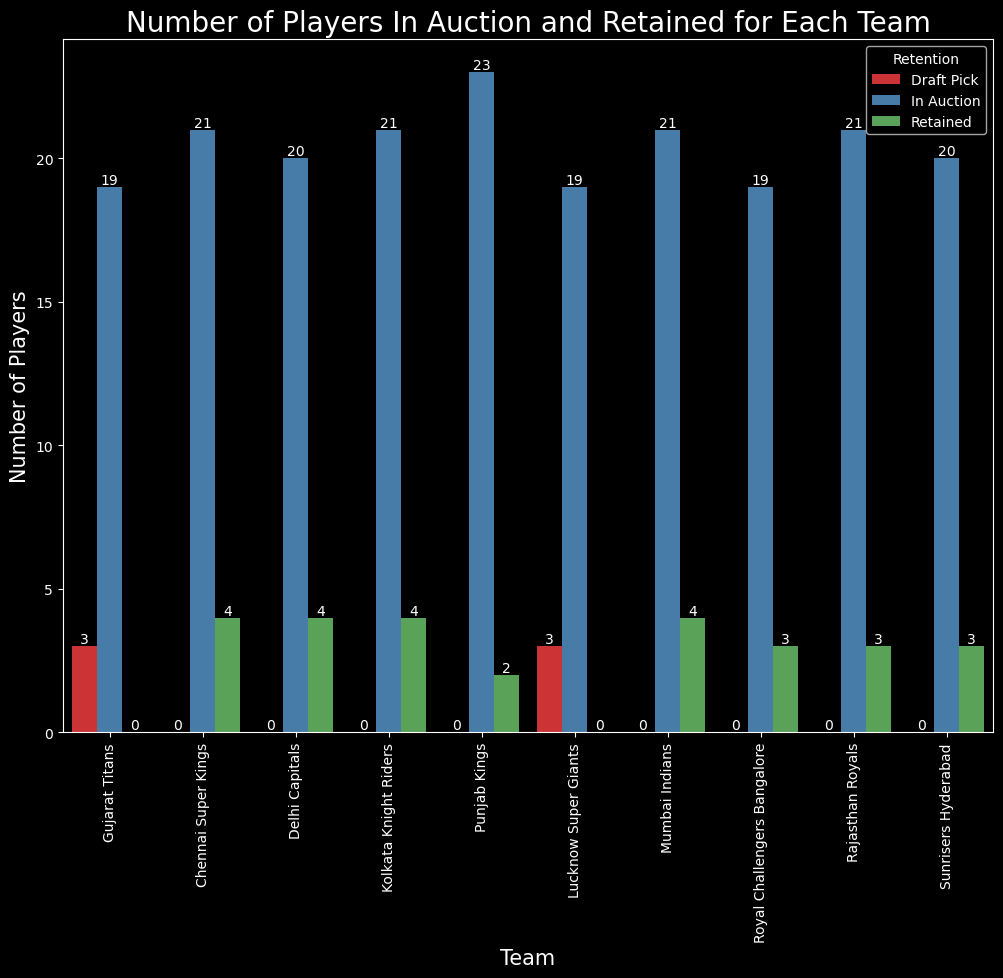

In [45]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(data=df[df['Curr_team']!='Unsold'], x='Curr_team', hue='retention', palette='Set1')
plt.xticks(rotation=90)
plt.title("Number of Players In Auction and Retained for Each Team", fontsize=20)
plt.xlabel("Team", fontsize=15)
plt.ylabel("Number of Players", fontsize=15)
plt.legend(title='Retention')

for bars in ax.containers:
    ax.bar_label(bars)

* Each team had to retain max 4 players
* GT and LSG had to Draft pick max 3 players

#### Sold vs Unsold for each type of players

In [46]:
type_df = df.groupby(['Type','status'])['Player'].count().reset_index()
type_df

,Type,status,Player
0,ALL-ROUNDER,Unsold,154
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


In [47]:
def plot_pie_for_type(type_data, ax):
    ax.pie(type_data['Player'], labels=type_data['status'], autopct='%1.1f%%', startangle=90, colors=random_colors)
    ax.set_title(f"{type_data['Type'].iloc[0]}S", fontsize=20)
    ax.axis('equal')

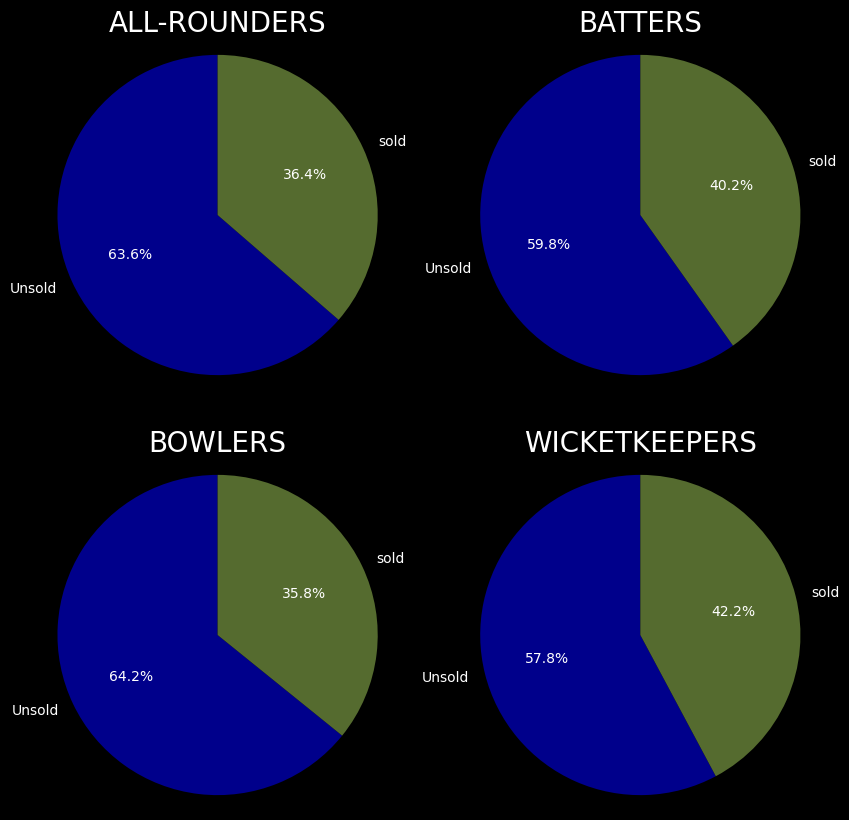

In [48]:
grouped_type = type_df.groupby('Type')
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
for (name, group), ax in zip(grouped_type, axes.flatten()):
    plot_pie_for_type(group, ax)
    ax.axis('off')

A player who is Wicket-keeper or a batter had a highest chance to be sold from this auction

#### Players Who were Brought by Their 2021 Teams in Auction

In [49]:
df.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians','KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings','DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [50]:
same_team = df[(df['Curr_team']==df['Prev_team']) & (df['retention']=='In Auction')]
same_team.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,100.0


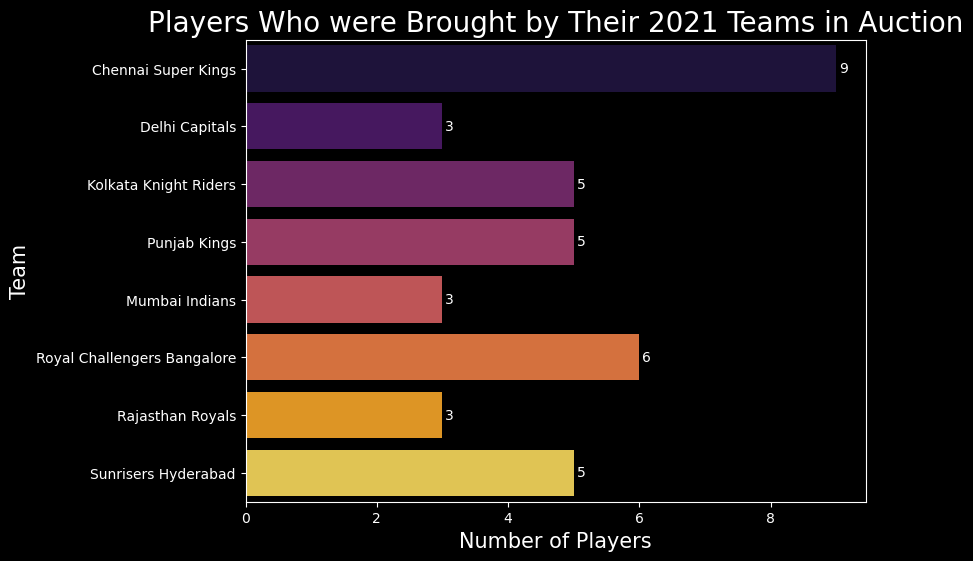

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=same_team, y='Curr_team', palette='inferno')
plt.title('Players Who were Brought by Their 2021 Teams in Auction', fontsize=20)
plt.ylabel('Team', fontsize=15)
plt.xlabel('Number of Players',fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

* CSK was focusing on taking back the maximum number of their former players
* RR, MI, and DC were focusing on rebuilding their teams

#### Number of players in each team based on thier roles

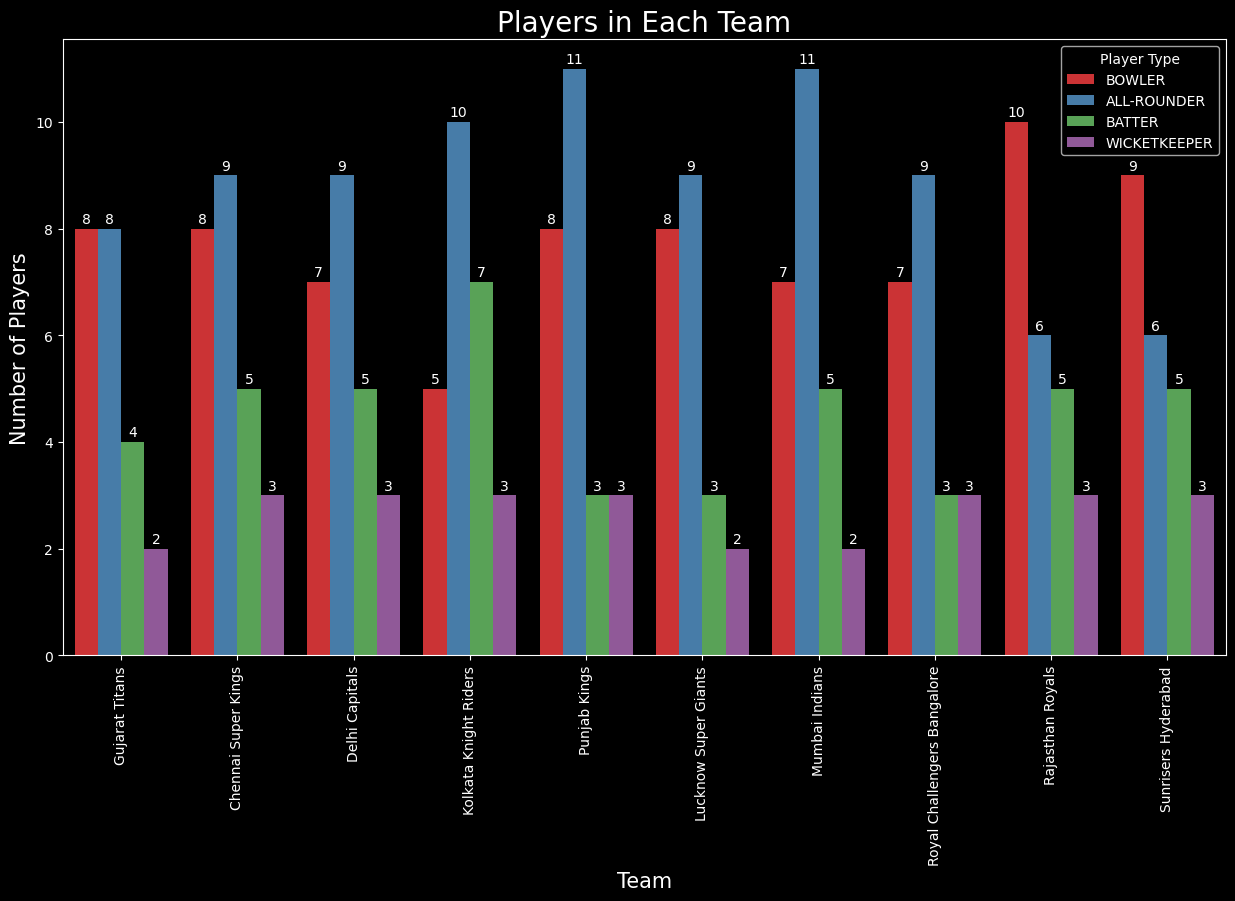

In [52]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df[df['Curr_team'] != 'Unsold'], x='Curr_team', hue='Type', palette='Set1')
plt.title('Players in Each Team', fontsize=20)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Number of Players', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

plt.xticks(rotation=90)
plt.legend(title='Player Type')

MI, PBKS, and KKR were more interested in picking All-Rounders

#### Heighest successful bid by each team

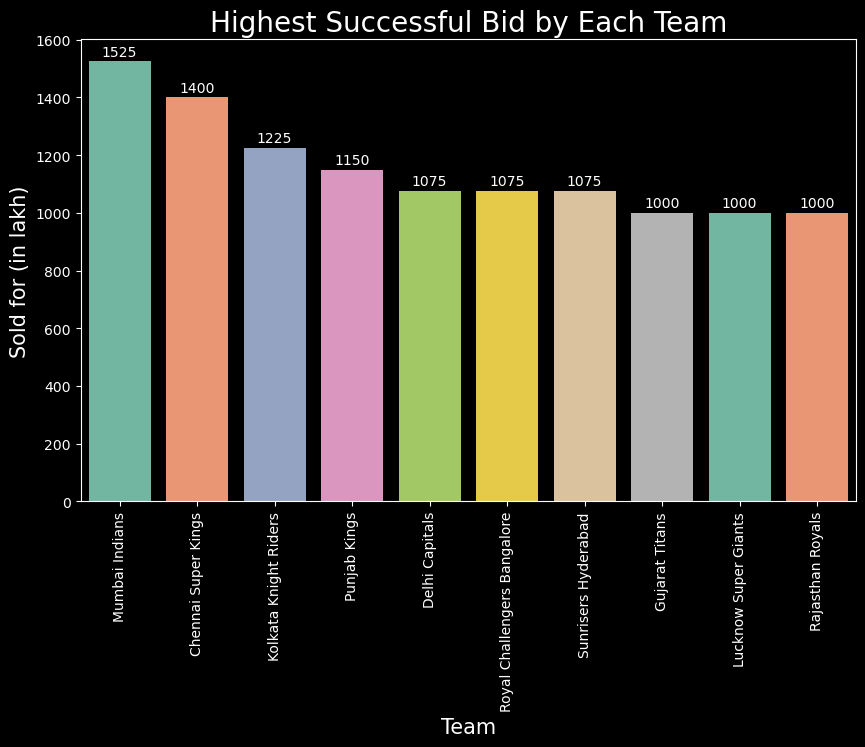

In [53]:
highest_bids = df[df['retention'] == 'In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=highest_bids.index, y=highest_bids.values, palette='Set2')
plt.title('Highest Successful Bid by Each Team', fontsize=20)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Sold for (in lakh)', fontsize=15)
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

MI had highest bid in this Auction

#### Top Five Batsman picked from Auction

In [54]:
def plot_highest_bids(player_type):
    highest_bids = df[(df['retention'] == 'In Auction') & (df['Type'] == player_type)].sort_values(by='Sold_for_lakh', ascending=False).head(5)
    labels = [f"{player} ({team})" for player, team in zip(highest_bids['Player'], highest_bids['Curr_team'])]
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=highest_bids, y=labels, x='Sold_for_lakh', palette='Set2')
    plt.title(f'Highest Successful Bid for {player_type.capitalize()}s', fontsize=20)
    plt.ylabel('Player (Team)', fontsize=15)
    plt.xlabel('Sold for (in lakh)', fontsize=15)
    plt.xticks(rotation=45)

    for bars in ax.containers:
        ax.bar_label(bars, padding=2)

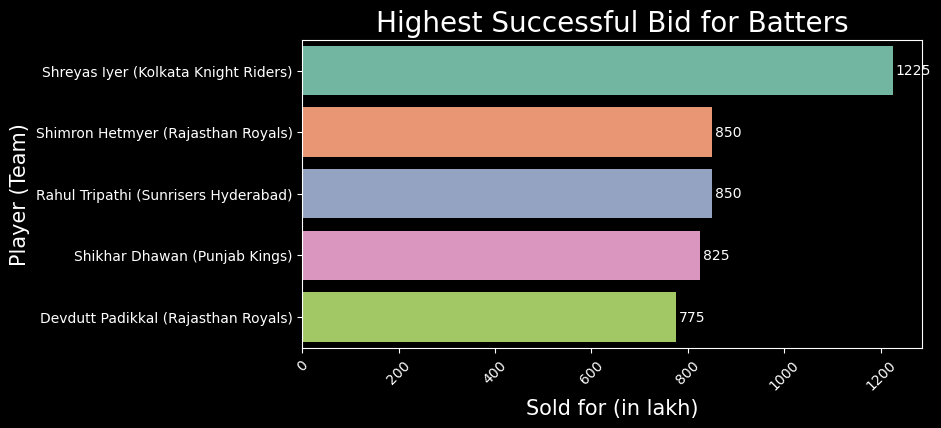

In [55]:
plot_highest_bids('BATTER')

Shreyas Iyer had joined KKR as the most costliest batter sold in this auction.

#### Top Five Bowlers picked from Auction

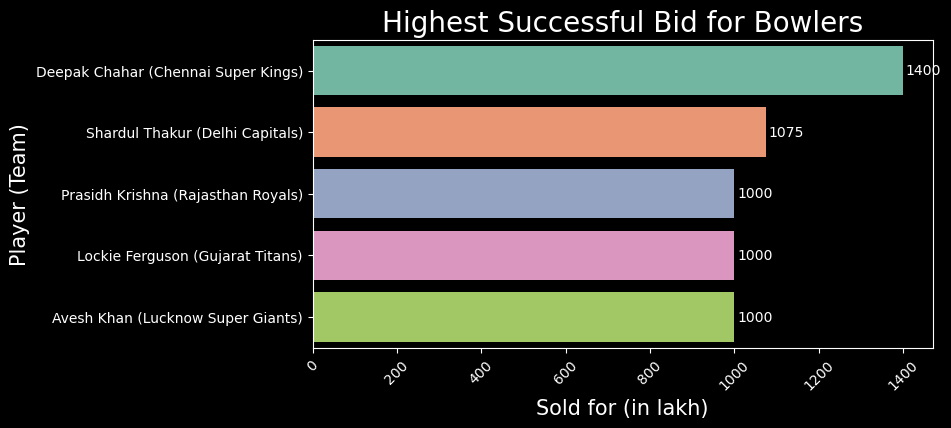

In [56]:
plot_highest_bids('BOWLER')

Deepak Chahar had joined CSK as the most costliest bowler sold in this auction.

#### Top Five All-Rounders picked from Auction

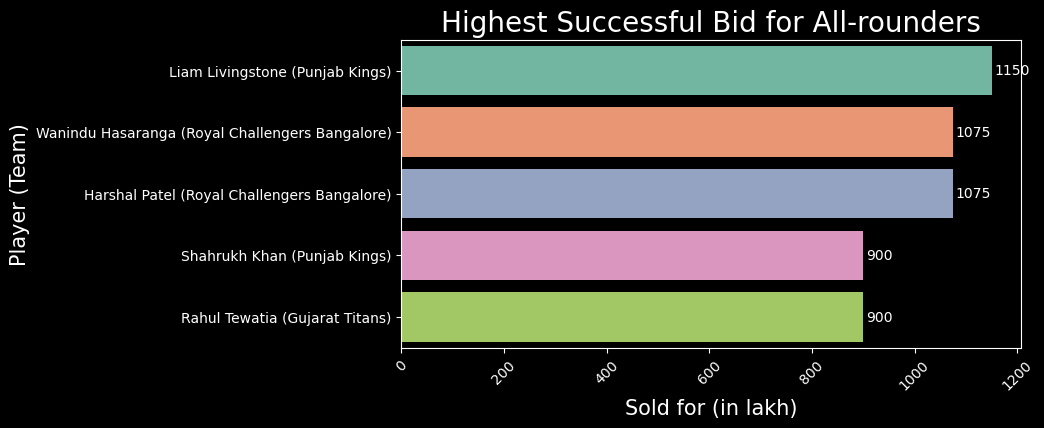

In [57]:
plot_highest_bids('ALL-ROUNDER')

Liam Livingstone had joined RCB as the most costliest All-Rounder sold in this auction.

#### Top Five Wicketkeepers picked from Auction

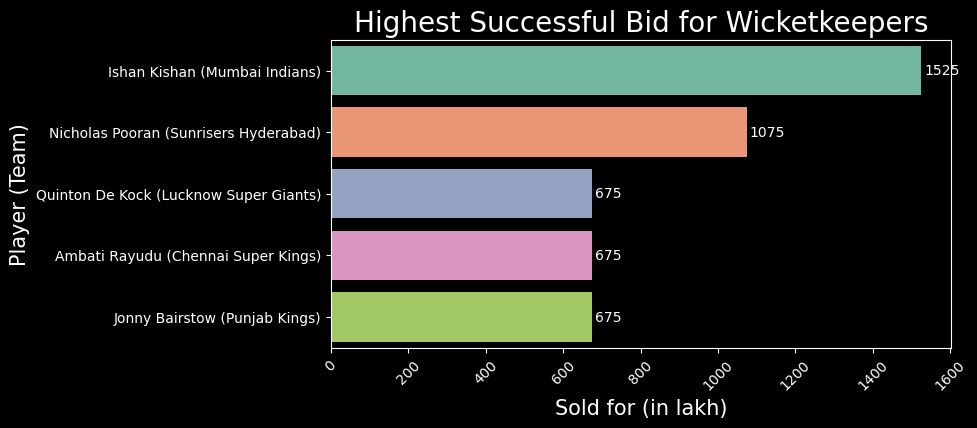

In [58]:
plot_highest_bids('WICKETKEEPER')

Ishan Kishan had joined MI as the most costliest Wicketkeeper sold in this auction.

#### Top 5 Retained player

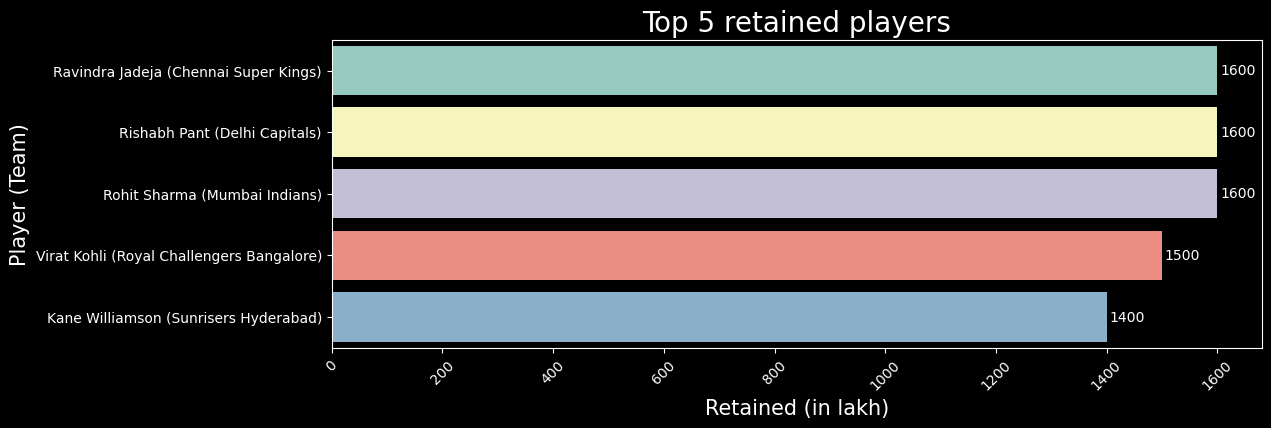

In [59]:
retain = df[df['retention']=='Retained'].sort_values(by = 'Sold_for_lakh', ascending = False).head(5)
labels = [f"{player} ({team})" for player, team in zip(retain['Player'], retain['Curr_team'])]
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=retain, y=labels, x='Sold_for_lakh', palette='Set3')
plt.title('Top 5 retained players', fontsize=20)
plt.ylabel('Player (Team)', fontsize=15)
plt.xlabel('Retained (in lakh)', fontsize=15)
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars, padding=2)

Ravindra Jadeja(CSK), Rishabh Pant(DC), Rohit Sharma(MI) were the most costliest retained players in this season

#### Amount Spent by each team in Auction

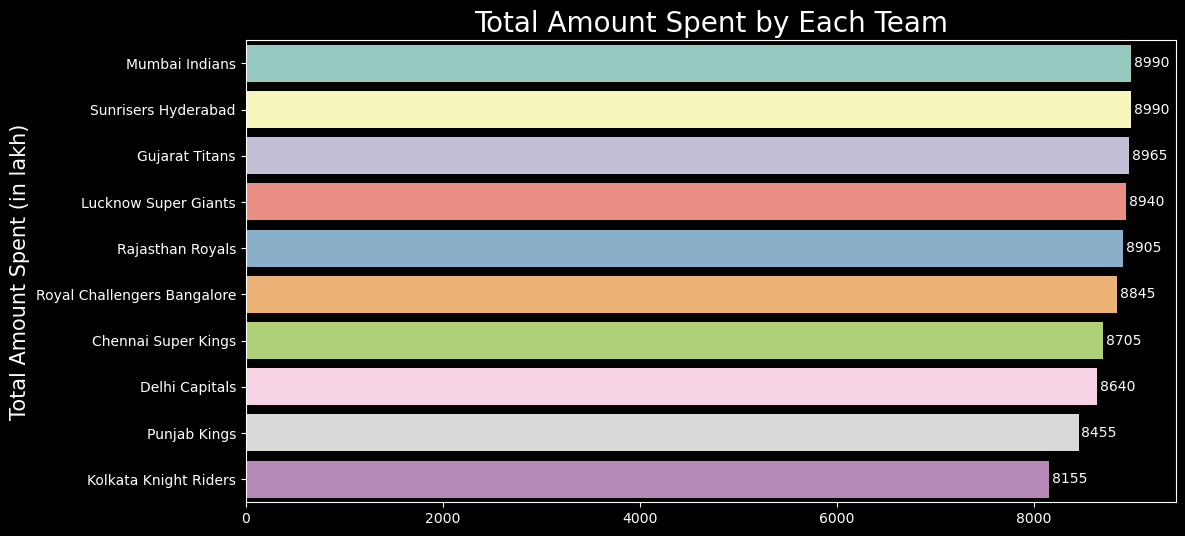

In [60]:
amount_spent = df[df['Curr_team'] != 'Unsold'].groupby('Curr_team')['Sold_for_lakh'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=amount_spent.index, x=amount_spent.values, palette='Set3')
plt.title('Total Amount Spent by Each Team', fontsize=20)
plt.ylabel('Team', fontsize=15)
plt.ylabel('Total Amount Spent (in lakh)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

MI spent highest 89.9 CR and KKR spent least 81.55 CR

### Insights
* Total 633 players were there in the TATA IPL 2022 Auction list
* Majority of players were either All-Rounders or Bowlers in Auction
* Majority of players were unsold in this Auction (Sold-> 396, Unsold-> 237)
* Each team had bought at least 22 players in their squad
* Each team had to retain max 4 players
* GT and LSG had to Draft pick max 3 players
* A player who is Wicket-keeper or a batter had a highest chance to be sold from this auction
* CSK was focusing on taking back the maximum number of their former players
* RR, MI, and DC were focusing on rebuilding their teams
* MI, PBKS, and KKR were more interested in picking All-Rounders
* MI had highest bid in this Auction
* Shreyas Iyer had joined KKR as the most costliest batter sold in this auction.
* Deepak Chahar had joined CSK as the most costliest bowler sold in this auction.
* Liam Livingstone had joined RCB as the most costliest All-Rounder sold in this auction.
* Ishan Kishan had joined MI as the most costliest Wicketkeeper sold in this auction.
* Ravindra Jadeja(CSK), Rishabh Pant(DC), Rohit Sharma(MI) were the most costliest retained players in this season
* MI spent highest 89.9 CR and KKR spent least 81.55 CR